In [1]:
### Mutation analysis ###
# wt only - No IgM

# observedMutations function calualte the basic mutational load. 
# Mutations can be calculated as counts or frequencies and divided into replacement (R) or 
# silent (S) mutations, and subset into FWR and CDR specific mutations. 

# Import required packages
library(alakazam)
library(shazam)
library(dplyr)
library(ggplot2)

# loading my tsv as a df
require(data.table)
my_data <- as.data.frame(fread("wt_igg_only_filtered_contig_heavy_germ-pass.tsv"))


# Load and subset example data
db <- subset(my_data, c_call %in% c("IGHG1", "IGHG2B", "IGHG2C","IGHG3"))

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [2]:
# Calculate R and S mutation counts
db_obs <- observedMutations(db, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=FALSE, 
                            nproc=1)
# Show new mutation count columns
db_obs %>% 
    select(sequence_id, starts_with("mu_count_")) %>%
    head(n=10)

,sequence_id,mu_count_seq_r,mu_count_seq_s
,<chr>,<dbl>,<dbl>
1,TTAGGACGTGGTACAG-1_contig_1,8,2
2,ATCTACTAGGGTATCG-1_contig_2,8,1
3,CTCATTATCATCGATG-1_contig_1,0,0
4,CGTAGCGGTCCGTGAC-1_contig_2,4,3
5,TAAGAGAAGACCCACC-1_contig_2,0,0
6,ACGGCCAGTAGCCTCG-1_contig_2,9,6
7,GGACATTCAAGGACTG-1_contig_2,3,1
8,TATCTCAAGACAAAGG-1_contig_1,5,3
9,CCATTCGCAGGTCTCG-1_contig_2,4,3


In [3]:
# Calculate R and S mutation frequencies
db_obs <- observedMutations(db_obs, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=TRUE, 
                            nproc=1)
# Show new mutation frequency columns
db_obs %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=10)

,sequence_id,mu_freq_seq_r,mu_freq_seq_s
,<chr>,<dbl>,<dbl>
1,TTAGGACGTGGTACAG-1_contig_1,0.023880597,0.005970149
2,ATCTACTAGGGTATCG-1_contig_2,0.023121387,0.002890173
3,CTCATTATCATCGATG-1_contig_1,0.000000000,0.000000000
4,CGTAGCGGTCCGTGAC-1_contig_2,0.011764706,0.008823529
5,TAAGAGAAGACCCACC-1_contig_2,0.000000000,0.000000000
6,ACGGCCAGTAGCCTCG-1_contig_2,0.026315789,0.017543860
7,GGACATTCAAGGACTG-1_contig_2,0.008746356,0.002915452
8,TATCTCAAGACAAAGG-1_contig_1,0.014836795,0.008902077
9,CCATTCGCAGGTCTCG-1_contig_2,0.011764706,0.008823529


In [4]:
# Calculate combined R and S mutation frequencies
db_obs <- observedMutations(db, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=TRUE, 
                            combine=TRUE,
                            nproc=1)
# Show new mutation frequency columns
db_obs %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id
,<chr>
1,TTAGGACGTGGTACAG-1_contig_1
2,ATCTACTAGGGTATCG-1_contig_2
3,CTCATTATCATCGATG-1_contig_1
4,CGTAGCGGTCCGTGAC-1_contig_2


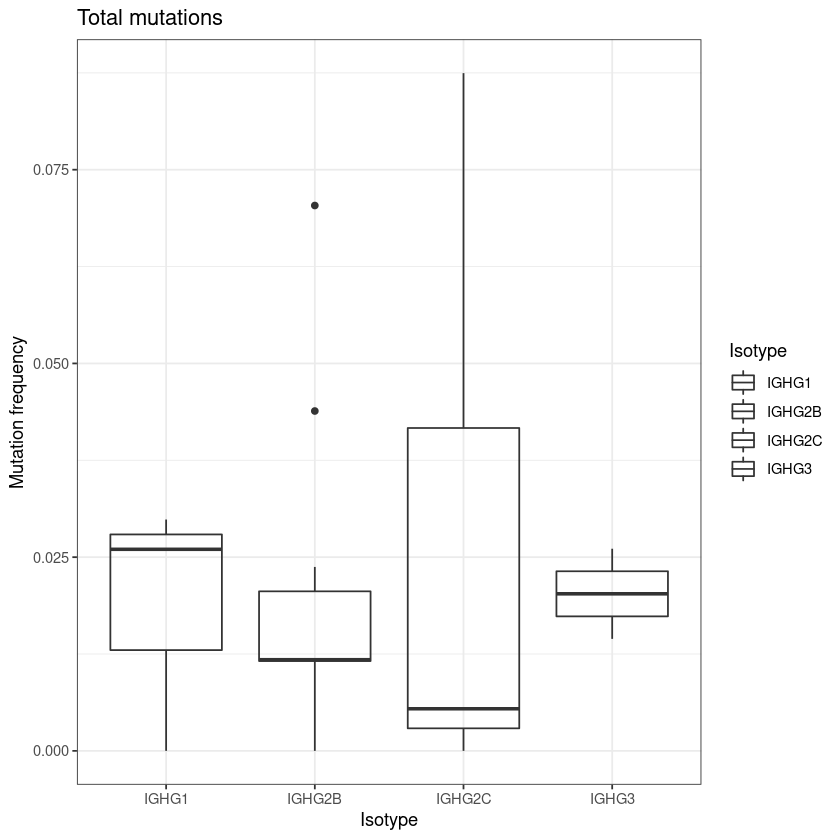

In [5]:
g1 <- ggplot(db_obs, aes(x=c_call, y=mu_freq, fill=c_call)) +
    theme_bw() + ggtitle("Total mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
plot(g1)

In [6]:
# Calculate R and S mutation counts for individual CDRs and FWRs
db_obs_v <- observedMutations(db, sequenceColumn="sequence_alignment",
                              germlineColumn="germline_alignment_d_mask",
                              regionDefinition=IMGT_V_BY_REGIONS,
                              frequency=FALSE, 
                              nproc=1)
# Show new FWR mutation columns
db_obs_v %>% 
    select(sequence_id, starts_with("mu_count_fwr")) %>%
    head(n=4)

,sequence_id,mu_count_fwr1_r,mu_count_fwr1_s,mu_count_fwr2_r,mu_count_fwr2_s,mu_count_fwr3_r,mu_count_fwr3_s
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TTAGGACGTGGTACAG-1_contig_1,0,0,1,0,3,2
2,ATCTACTAGGGTATCG-1_contig_2,4,0,0,0,3,1
3,CTCATTATCATCGATG-1_contig_1,0,0,0,0,0,0
4,CGTAGCGGTCCGTGAC-1_contig_2,1,1,1,1,2,1


In [7]:
# Calculate aggregate CDR and FWR V-segment R and S mutation frequencies
db_obs_v <- observedMutations(db_obs_v, sequenceColumn="sequence_alignment",
                              germlineColumn="germline_alignment_d_mask",
                              regionDefinition=IMGT_V,
                              frequency=TRUE, 
                              nproc=1)
# Show new CDR and FWR mutation frequency columns
db_obs_v %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id,mu_freq_cdr_r,mu_freq_cdr_s,mu_freq_fwr_r,mu_freq_fwr_s
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,TTAGGACGTGGTACAG-1_contig_1,0.08333333,0,0.01666667,0.008333333
2,ATCTACTAGGGTATCG-1_contig_2,0.00000000,0,0.02916667,0.004166667
3,CTCATTATCATCGATG-1_contig_1,0.00000000,0,0.00000000,0.000000000
4,CGTAGCGGTCCGTGAC-1_contig_2,0.00000000,0,0.01666667,0.012500000


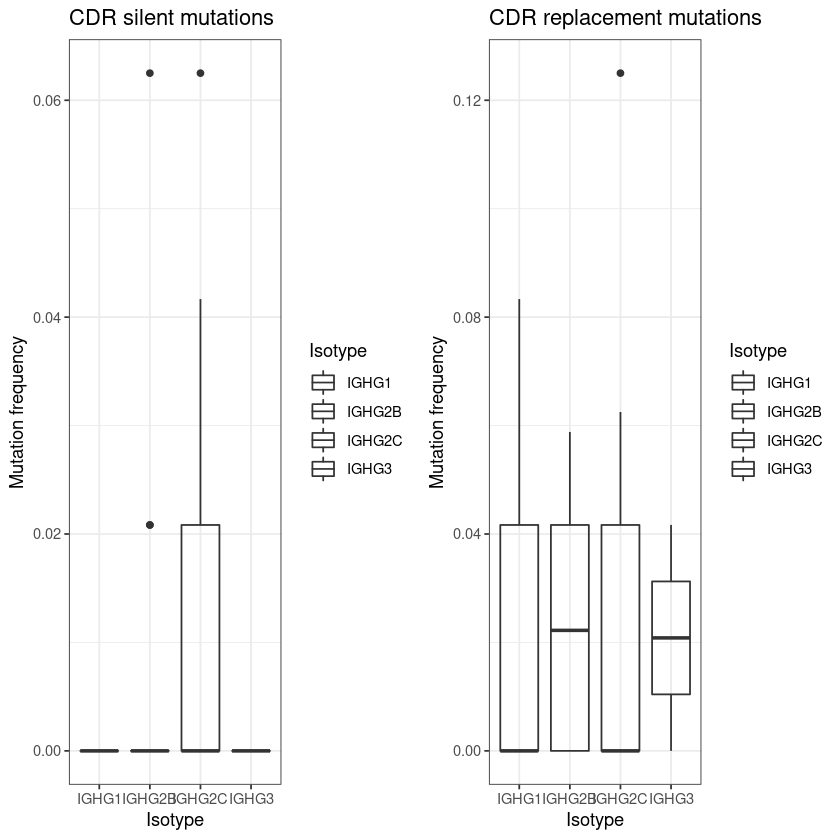

In [8]:
g2 <- ggplot(db_obs_v, aes(x=c_call, y=mu_freq_cdr_s, fill=c_call)) +
    theme_bw() + ggtitle("CDR silent mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
g3 <- ggplot(db_obs_v, aes(x=c_call, y=mu_freq_cdr_r, fill=c_call)) +
    theme_bw() + ggtitle("CDR replacement mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
alakazam::gridPlot(g2, g3, ncol=2)

In [9]:
# Calculate charge mutation frequency for the full sequence
db_obs_ch <- observedMutations(db, sequenceColumn="sequence_alignment",
                               germlineColumn="germline_alignment_d_mask",
                               regionDefinition=NULL,
                               mutationDefinition=CHARGE_MUTATIONS,
                               frequency=TRUE, 
                               nproc=1)
# Show new charge mutation frequency columns
db_obs_ch %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id,mu_freq_seq_r,mu_freq_seq_s
,<chr>,<dbl>,<dbl>
1,TTAGGACGTGGTACAG-1_contig_1,0.000000000,0.02985075
2,ATCTACTAGGGTATCG-1_contig_2,0.008670520,0.01734104
3,CTCATTATCATCGATG-1_contig_1,0.000000000,0.00000000
4,CGTAGCGGTCCGTGAC-1_contig_2,0.002941176,0.01764706


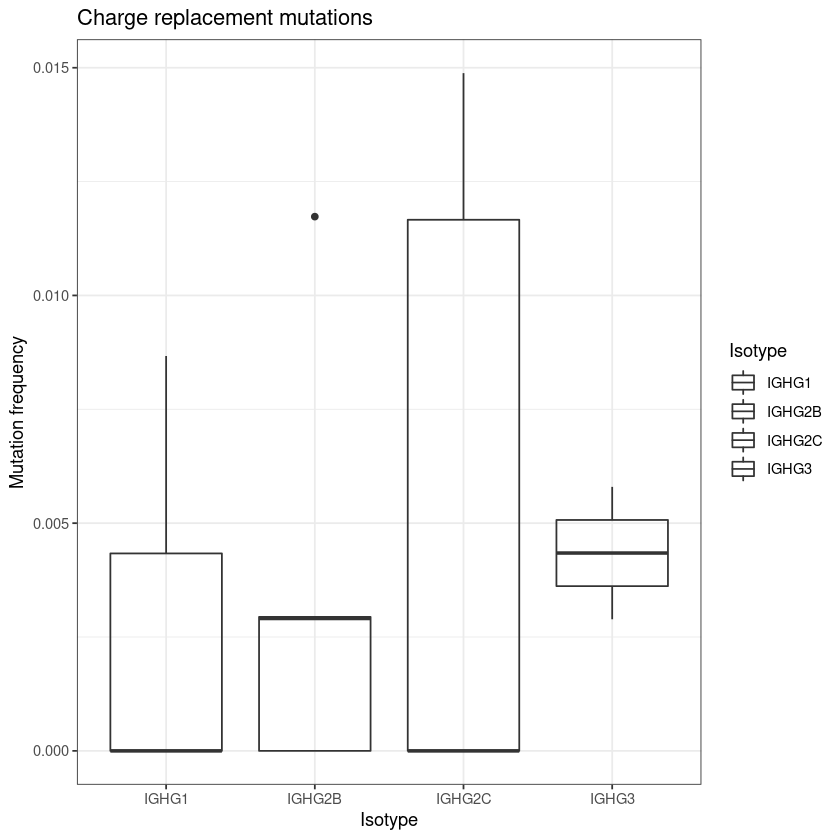

In [10]:
g4 <- ggplot(db_obs_ch, aes(x=c_call, y=mu_freq_seq_r, fill=c_call)) +
    theme_bw() + ggtitle("Charge replacement mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
plot(g4)